In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import kerastuner as kt
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from sklearn import metrics
import pickle

In [2]:
TrainDx = pd.read_csv('../input/prerocessed-danger-nbaiot/TrainDx.csv')
TrainDy = pd.read_csv('../input/prerocessed-danger-nbaiot/TrainDy.csv')
ValDx = pd.read_csv('../input/prerocessed-danger-nbaiot/ValDx.csv')
ValDy = pd.read_csv('../input/prerocessed-danger-nbaiot/ValDy.csv')

In [25]:
with open('../input/danger-models/XGDanger.pkl', 'rb') as file:
    xgb = pickle.load(file)
with open('../input/danger-models/SVMDanger.pkl', 'rb') as file:
    clf = pickle.load(file)
with open('../input/danger-models/ANNDanger.pkl', 'rb') as file:
    ann = pickle.load(file)
with open('../input/danger-models/RNNDanger.pkl', 'rb') as file:
    rnn = pickle.load(file)
with open('../input/rf-models/RFDanger.pkl', 'rb') as file:
    rf = pickle.load(file)

## Prediction probabilites from individual models

In [26]:
predictionProbTrain1 = pd.DataFrame(xgb.predict_proba(TrainDx))
predictionProbTrain2 = pd.DataFrame(clf.predict_proba(TrainDx))
predictionProbTrain3 = pd.DataFrame(ann.predict(TrainDx))
predictionProbTrain4 = pd.DataFrame(rnn.predict(TrainDx))
predictionProbTrain5 = pd.DataFrame(rf.predict_proba(TrainDx))

15520/15520 [==============================] - 103s 7ms/step


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished


In [27]:
predictionProbTrain3[0] = 1-predictionProbTrain3[0]
predictionProbTrain4[0] = 1-predictionProbTrain4[0]
predictionProbTrain3[1] = 1-predictionProbTrain3[0]
predictionProbTrain4[1] = 1-predictionProbTrain4[0]

In [28]:
probTrains = [predictionProbTrain1, predictionProbTrain2, predictionProbTrain3, predictionProbTrain4, predictionProbTrain5]
predictionFrameInputTrain = pd.concat(probTrains, axis = 1)

In [29]:
predictionFrameInputTrain

,0,1,0,1,0,1,0,1,0,1
0,9.999997e-01,3.018831e-07,9.999960e-01,0.000004,0.999986,0.000014,1.000000e+00,0.000000,0.999926,0.000074
1,9.999974e-01,2.611881e-06,9.999296e-01,0.000070,0.999985,0.000015,1.000000e+00,0.000000,0.999925,0.000075
2,9.999978e-01,2.196876e-06,9.999396e-01,0.000060,0.999983,0.000017,1.000000e+00,0.000000,0.999925,0.000075
3,2.980232e-06,9.999970e-01,3.000001e-14,1.000000,0.000001,0.999999,0.000000e+00,1.000000,0.000423,0.999577
4,9.999991e-01,9.211543e-07,9.999940e-01,0.000006,0.999987,0.000013,1.000000e+00,0.000000,0.999925,0.000075
...,...,...,...,...,...,...,...,...,...,...
496607,9.999993e-01,6.873339e-07,9.999866e-01,0.000013,0.999984,0.000016,1.000000e+00,0.000000,0.999921,0.000079
496608,8.344650e-07,9.999992e-01,3.000001e-14,1.000000,0.000001,0.999999,3.576279e-07,1.000000,0.000361,0.999639
496609,9.999988e-01,1.214842e-06,9.999852e-01,0.000015,0.999979,0.000021,1.000000e+00,0.000000,0.999927,0.000073
496610,1.132488e-05,9.999887e-01,1.170080e-02,0.988299,0.003005,0.996995,5.657077e-04,0.999434,0.000399,0.999601


In [30]:
predictionProbVal1 = pd.DataFrame(xgb.predict_proba(ValDx))
predictionProbVal2 = pd.DataFrame(clf.predict_proba(ValDx))
predictionProbVal3 = pd.DataFrame(ann.predict(ValDx))
predictionProbVal4 = pd.DataFrame(rnn.predict(ValDx))
predictionProbVal5 = pd.DataFrame(rf.predict_proba(ValDx))

6652/6652 [==============================] - 42s 6ms/step


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [31]:
predictionProbVal3[0] = 1-predictionProbVal3[0]
predictionProbVal4[0] = 1-predictionProbVal4[0]
predictionProbVal3[1] = 1-predictionProbVal3[0]
predictionProbVal4[1] = 1-predictionProbVal4[0]

In [32]:
probVals = [predictionProbVal1, predictionProbVal2, predictionProbVal3, predictionProbVal4, predictionProbVal5]
predictionFrameInputVal = pd.concat(probVals, axis = 1)

In [34]:
predictionFrameInputVal

,0,1,0,1,0,1,0,1,0,1
0,2.980232e-06,0.999997,3.000001e-14,1.000000,0.000001,0.999999,7.152557e-07,0.999999,0.000361,0.999639
1,1.323223e-05,0.999987,1.170081e-02,0.988299,0.003005,0.996995,5.657077e-04,0.999434,0.000399,0.999601
2,3.814697e-06,0.999996,3.000001e-14,1.000000,0.000009,0.999991,0.000000e+00,1.000000,0.000296,0.999704
3,2.741814e-06,0.999997,3.000001e-14,1.000000,0.000001,0.999999,0.000000e+00,1.000000,0.000245,0.999755
4,1.049042e-05,0.999990,3.000001e-14,1.000000,0.000001,0.999999,0.000000e+00,1.000000,0.000231,0.999769
...,...,...,...,...,...,...,...,...,...,...
212830,2.384186e-07,1.000000,3.000001e-14,1.000000,0.000001,0.999999,0.000000e+00,1.000000,0.000225,0.999775
212831,1.192093e-07,1.000000,3.000001e-14,1.000000,0.000001,0.999999,0.000000e+00,1.000000,0.000243,0.999757
212832,8.344650e-07,0.999999,3.000001e-14,1.000000,0.000001,0.999999,0.000000e+00,1.000000,0.000365,0.999635
212833,9.999974e-01,0.000003,9.999823e-01,0.000018,0.999985,0.000015,1.000000e+00,0.000000,0.999924,0.000076


## Final Model

In [35]:
def build_model(hp):
    model = Sequential()
    counter=0
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
        if counter == 0:
            model.add(Dense(hp.Int('units'+str(i), min_value=8, max_value=48, step=8), activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid']), input_dim=10))
        else:
            model.add(Dense(hp.Int('units'+str(i), min_value=8, max_value=48, step=8), activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])))
        counter += 1
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [39]:
tuner= kt.RandomSearch(build_model, objective='val_accuracy', max_trials=2)

In [40]:
tuner.search(predictionFrameInputTrain, TrainDy, epochs=2, validation_data = (predictionFrameInputVal, ValDy))

Trial 2 Complete [00h 01m 32s]
val_accuracy: 0.9999718070030212

Best val_accuracy So Far: 0.9999718070030212
Total elapsed time: 00h 03m 03s


In [72]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Number of layers are: " + str(best_hps.get('num_layers')))
print("Layer1 is "+best_hps.get('activation0')+" of size "+str(best_hps.get('units0')))
print("Layer2 is "+best_hps.get('activation1')+" of size "+str(best_hps.get('units1')))

Number of layers are: 2
Layer1 is relu of size 16
Layer2 is relu of size 8


In [45]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
def accFinder(X, y, treshold):
    return metrics.accuracy_score(pd.DataFrame((best_model.predict(X)>treshold).astype(int)), y)

## Accuracies

In [48]:
acc_card = []

In [49]:
acc_card.append(accFinder(predictionFrameInputTrain, TrainDy, 0.5))

15520/15520 [==============================] - 22s 1ms/step


In [50]:
acc_card.append(accFinder(predictionFrameInputVal, ValDy, 0.5))

6652/6652 [==============================] - 9s 1ms/step


In [51]:
TestDx = pd.read_csv('../input/prerocessed-danger-nbaiot/TestDx.csv')
TestDy = pd.read_csv('../input/prerocessed-danger-nbaiot/TestDy.csv')

In [52]:
predictionProbTest1 = pd.DataFrame(xgb.predict_proba(TestDx))
predictionProbTest2 = pd.DataFrame(clf.predict_proba(TestDx))
predictionProbTest3 = pd.DataFrame(ann.predict(TestDx))
predictionProbTest4 = pd.DataFrame(rnn.predict(TestDx))
predictionProbTest5 = pd.DataFrame(rf.predict_proba(TestDx))

9502/9502 [==============================] - 60s 6ms/step


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


In [53]:
predictionProbTest3[0] = 1-predictionProbTest3[0]
predictionProbTest4[0] = 1-predictionProbTest4[0]
predictionProbTest3[1] = 1-predictionProbTest3[0]
predictionProbTest4[1] = 1-predictionProbTest4[0]

In [54]:
probTests = [predictionProbTest1, predictionProbTest2, predictionProbTest3, predictionProbTest4, predictionProbTest5]
predictionFrameInputTest = pd.concat(probTests, axis = 1)

In [55]:
predictionFrameInputTest

,0,1,0,1,0,1,0,1,0,1
0,5.960464e-07,0.999999,3.000001e-14,1.000000e+00,0.000001,0.999999,0.000000,1.000000e+00,0.000250,0.999750
1,9.536743e-07,0.999999,3.000001e-14,1.000000e+00,0.000001,0.999999,0.000000,1.000000e+00,0.000159,0.999841
2,9.999971e-01,0.000003,9.999668e-01,3.319868e-05,0.999987,0.000013,0.999999,1.192093e-06,0.999907,0.000093
3,1.323223e-05,0.999987,1.170081e-02,9.882992e-01,0.003005,0.996995,0.000566,9.994343e-01,0.000399,0.999601
4,9.999969e-01,0.000003,9.999935e-01,6.468304e-06,0.999972,0.000028,1.000000,0.000000e+00,0.999924,0.000076
...,...,...,...,...,...,...,...,...,...,...
304045,9.999980e-01,0.000002,9.999890e-01,1.096543e-05,0.999980,0.000020,1.000000,2.980232e-07,0.999923,0.000077
304046,9.999976e-01,0.000002,9.999807e-01,1.928102e-05,0.999985,0.000015,1.000000,0.000000e+00,0.999927,0.000073
304047,9.999971e-01,0.000003,9.999665e-01,3.345338e-05,0.999981,0.000019,1.000000,0.000000e+00,0.999925,0.000075
304048,9.999985e-01,0.000002,9.999999e-01,1.000000e-07,0.999987,0.000013,0.999993,7.331371e-06,0.999905,0.000095


In [56]:
acc_card.append(accFinder(predictionFrameInputTest, TestDy, 0.5))

9502/9502 [==============================] - 14s 1ms/step


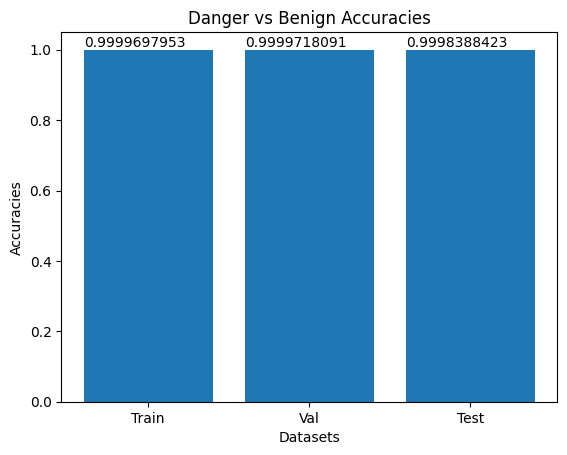

In [73]:
# Create a list of indices for the x-axis
indices = range(len(acc_card))
# Create the bar graph
bars = plt.bar(indices, acc_card)
# Optionally, you can set the labels for the x-axis to be something other than the indices
labels = ['Train', 'Val', 'Test']
plt.xticks(indices, labels)
# Labeling the axes
plt.xlabel('Datasets')
plt.ylabel('Accuracies')
# Giving a title to the graph
plt.title('Danger vs Benign Accuracies')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, '{:.10f}'.format(yval), va='bottom') # va: vertical alignment
plt.show()

## Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
TestPreds = (best_model.predict(predictionFrameInputTest)>0.5).astype(int)

9502/9502 [==============================] - 13s 1ms/step


In [60]:
cm = pd.DataFrame(confusion_matrix(pd.DataFrame(TestPreds), TestDy, labels=[0,1]))
cm

,0,1
0,153901,41
1,8,150100


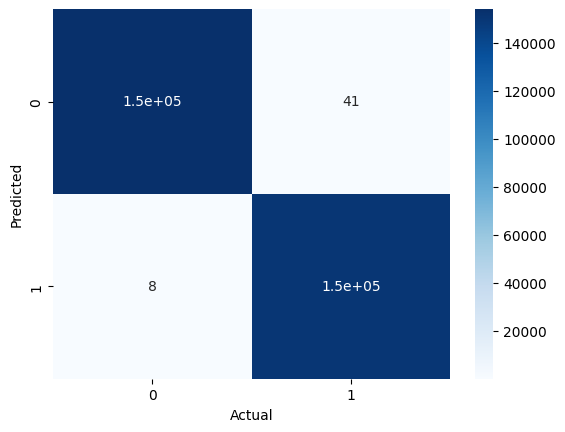

In [61]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [62]:
def recall(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=labels)
    true = confMat[type][type]
    total = 0
    for i in range(len(labels)):
        total += confMat[i][type]
    return true/total

def precision(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=labels)
    true = confMat[type][type]
    total = 0
    for i in range(len(labels)):
        total += confMat[type][i]
    return true/total

def specificity(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=labels)
    true = 0
    for i in range(len(labels)):
        if(i==type):
            continue;
        true += confMat[i][i]
    total = 0
    for j in range(len(labels)):
        if(j==type):
            continue
        for i in range(len(labels)):
            total += confMat[i][j]
    return true/total

In [63]:
labels=[0,1]

In [64]:
for i in range(len(labels)):
    print('recall of class '+str(i)+': '+str(recall(i, TestPreds, TestDy, [0,1])))

recall of class 0: 0.9999480212333262
recall of class 1: 0.9997269233587095


In [65]:
for i in range(len(labels)):
    print('precision of class '+str(i)+': '+str(precision(i, TestPreds, TestDy, [0,1])))

precision of class 0: 0.999733665926128
precision of class 1: 0.9999467050390386


In [66]:
for i in range(len(labels)):
    print('specificity of class '+str(i)+': '+str(specificity(i, TestPreds, TestDy, [0,1])))

specificity of class 0: 0.9997269233587095
specificity of class 1: 0.9999480212333262


## Saving the model

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32, whiten=True)

In [70]:
import joblib
dt = {
    'pca':pca,
    'xgb': xgb,
    'clf': clf,
    'ann': ann,
    'rnn': rnn,
    'rf': rf,
    'ANNDanger':best_model,
}
joblib.dump(dt, 'DangerModel.joblib')

['DangerModel.joblib']